#### test mcsm-membrane performance on membrane mutation stability prediction

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
annotation_file = '../../datasets/annotation/mcsm_membrane_stability_blind.tsv'
annotation = pd.read_csv(annotation_file, sep='\t')
annotation.head()

,DDG,PDB,MUTATION,CHAIN,PRED
0,-1.3,1AFO.pdb,L75A,A,-0.530
1,-1.8,1AFO.pdb,I76A,A,-1.898
2,-1.7,1AFO.pdb,G79A,A,-1.228
3,-0.4,1AFO.pdb,V80A,A,-1.538
4,-1.3,2K73.pdb,A62G,A,-0.141


In [3]:
label = np.array(annotation['DDG'].values)
pred = np.array(annotation['PRED'].values)
print(label)
print(pred)

[-1.3 -1.8 -1.7 -0.4 -1.3 -0.1  0.1 -3.6 -2.  -3.8 -2.  -2.1 -2.7 -3.3
 -3.1 -0.2 -2.4  0.4  2.3  0.4 -0.7  1.1 -3.2 -1.  -0.9 -1.9 -1.   1.3
 -0.2  0.   0.2  0.4  0.1 -1.2 -2.5 -1. ]
[-0.53  -1.898 -1.228 -1.538 -0.141 -1.352 -1.532 -0.8   -0.728 -1.611
 -0.975 -1.388 -1.306 -1.562 -0.799 -1.28  -1.096 -0.433 -0.552 -0.031
 -0.176  0.074 -1.144 -1.544 -0.807 -1.302 -0.354 -1.433 -0.652 -0.298
 -1.903 -1.406 -0.725 -1.039 -1.464 -0.605]


In [6]:
print('rmse=', mean_squared_error(label,pred))
print('r-square=', r2_score(label,pred))
print('pearson-cc=',pearsonr(label,pred)[0])
print('pearson-cc p-value=',pearsonr(label,pred)[1])

rmse= 1.934918555555556
r-square= 0.0739931064279199
pearson-cc= 0.2903886755028478
pearson-cc p-value= 0.08578118557087314


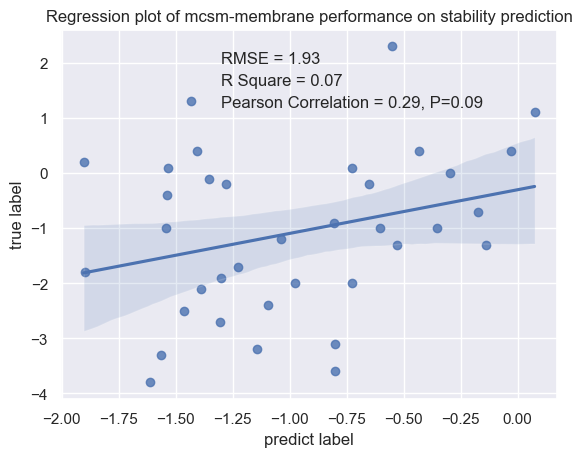

In [7]:
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(x=pred,y=label)

plt.text(-1.3, 2, 'RMSE = %.2f'%(mean_squared_error(label,pred)))
plt.text(-1.3, 1.6, 'R Square = %.2f'%(r2_score(label,pred)))
plt.text(-1.3, 1.2, 'Pearson Correlation = %.2f, P=%.2f'%(pearsonr(label,pred)[0],pearsonr(label,pred)[1]))

plt.ylabel("true label")
plt.xlabel("predict label")
plt.title('Regression plot of mcsm-membrane performance on stability prediction')
plt.savefig('images/mcsm-membrane-stab.png',dpi=300, bbox_inches = 'tight')
plt.show()